In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

denver_data=pd.read_csv('/users/neiloza/Downloads/crime.csv', parse_dates=True, index_col='INCIDENT_ID')
denver_data.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_data.REPORTED_DATE)




In [97]:
denver_traffic=denver_data[denver_data['IS_TRAFFIC']==1]
denver_traffic=denver_traffic[denver_traffic['IS_CRIME']!=1]
denver_crime=denver_data[denver_data['IS_CRIME']==1]
denver_crime




,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
INCIDENT_ID,,,,,,,,,,,,,,,,,,
2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,2018-01-26 12:24:00,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,2018-01-31 07:07:00,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


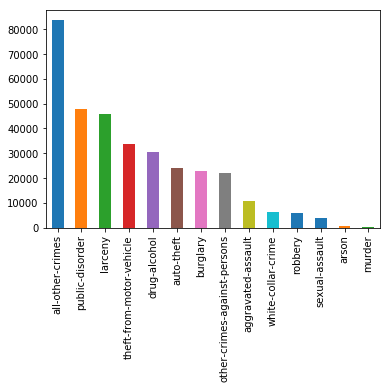

In [4]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.show()

COUNT                                    \
OFFENSE_CATEGORY_ID aggravated-assault all-other-crimes arson auto-theft   
REPORTED_DATE                                                              
2014                              1743            15251   129       3404   
2015                              2006            15728   107       4480   
2016                              2143            16462    95       4818   
2017                              2099            17232   125       5560   
2018                              2447            17629   114       5339   
2019                               179             1193     3        323   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
REPORTED_DATE                                              
2014                    4423         5978    9044     32   
2015                    4862         6186    8830     57   
2016                    4689         6081    9139     54   
2017                    4450         5670    8967     58   
2018                    4101         6136    9245     57   
2019                     233          378     581      1   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
REPORTED_DATE                                                              
2014                                        4046            9799    1057   
2015                                        4409            9776    1213   
2016                                        4638            9917    1154   
2017                                        4756            9348    1206   
2018                                        4089            8598    1203   
2019                                         256             487      71   

                                                                                
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle white-collar-crime  
REPORTED_DATE                                                                   
2014                           519                     4962                915  
2015                           685                     6255               1277  
2016                           710                     6549               1210  
2017                           854                     7327               1297  
2018                           885                     8126               1299  
2019                            53                      432                102

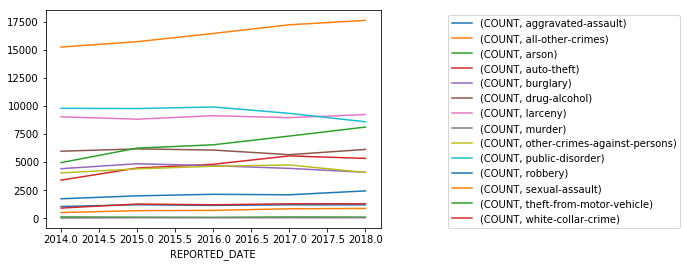

In [29]:
denver_crime_by_year=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_year=denver_crime_by_year.groupby([denver_crime_by_year.REPORTED_DATE.dt.year,denver_crime_by_year.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_year.columns=['COUNT']
denver_crime_by_year=denver_crime_by_year.unstack(level=1)
denver_crime_by_year.loc[:2018,:].plot(kind='line',)
plt.legend(loc=(1.2,0))
denver_crime_by_year

In [30]:
denver_crime_by_year['TOTAL']=denver_crime_by_year.sum(axis=1)
denver_crime_by_year

COUNT                                    \
OFFENSE_CATEGORY_ID aggravated-assault all-other-crimes arson auto-theft   
REPORTED_DATE                                                              
2014                              1743            15251   129       3404   
2015                              2006            15728   107       4480   
2016                              2143            16462    95       4818   
2017                              2099            17232   125       5560   
2018                              2447            17629   114       5339   
2019                               179             1193     3        323   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
REPORTED_DATE                                              
2014                    4423         5978    9044     32   
2015                    4862         6186    8830     57   
2016                    4689         6081    9139     54   
2017                    4450         5670    8967     58   
2018                    4101         6136    9245     57   
2019                     233          378     581      1   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
REPORTED_DATE                                                              
2014                                        4046            9799    1057   
2015                                        4409            9776    1213   
2016                                        4638            9917    1154   
2017                                        4756            9348    1206   
2018                                        4089            8598    1203   
2019                                         256             487      71   

                                                             \
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle   
REPORTED_DATE                                                 
2014                           519                     4962   
2015                           685                     6255   
2016                           710                     6549   
2017                           854                     7327   
2018                           885                     8126   
2019                            53                      432   

                                        TOTAL  
OFFENSE_CATEGORY_ID white-collar-crime         
REPORTED_DATE                                  
2014                               915  61302  
2015                              1277  65871  
2016                              1210  67659  
2017                              1297  68949  
2018                              1299  69268  
2019                               102   4292

/Users/neiloza/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


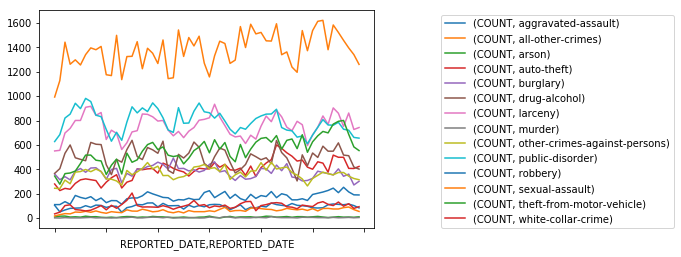

In [6]:
denver_crime_by_m_y=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_m_y.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_crime_by_m_y.REPORTED_DATE)
denver_crime_by_m_y=denver_crime_by_m_y.groupby([denver_crime_by_m_y.REPORTED_DATE.dt.year,denver_crime_by_m_y.REPORTED_DATE.dt.month,denver_crime_by_m_y.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_m_y.columns=['COUNT']
denver_crime_by_m_y=denver_crime_by_m_y.unstack(level=2)

denver_crime_by_m_y.loc[:(2018,12),:].plot(kind='line')
plt.legend(loc=(1.2,0))
plt.show()
#denver_crime_by_year

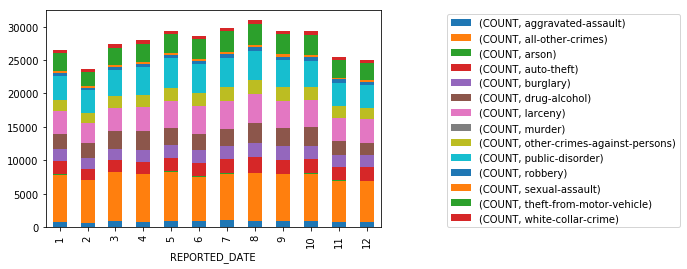

In [11]:
denver_crime_by_month=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_month.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_crime_by_month.REPORTED_DATE)
denver_crime_by_month=denver_crime_by_month.loc[denver_crime_by_month['REPORTED_DATE']<'2019-01-01',:]
denver_crime_by_month=denver_crime_by_month.groupby([denver_crime_by_month.REPORTED_DATE.dt.month,denver_crime_by_month.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_month.columns=['COUNT']
denver_crime_by_month=denver_crime_by_month.unstack(level=1)
denver_crime_by_month.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.show()

In [117]:
denver_crime_by_district=denver_crime[['OFFENSE_CATEGORY_ID','DISTRICT_ID']]
denver_crime_by_district=denver_crime_by_district.groupby(['DISTRICT_ID','OFFENSE_CATEGORY_ID']).size()
denver_crime_by_district=denver_crime_by_district.unstack(level=1)
denver_crime_by_district_w_totals=denver_crime_by_district
denver_crime_by_district.loc[7,'arson']=0
denver_crime_by_district['TOTAL']=denver_crime_by_district.sum(axis=1)
denver_crime_by_district_w_totals.loc['TOTAL']=denver_crime_by_district.sum(axis=0)
denver_crime_by_district_w_totals

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
DISTRICT_ID,,,,,,,,,,,,,,,
1,1653.0,17061.0,116.0,4369.0,4005.0,4697.0,6530.0,25.0,3690.0,8451.0,907.0,630.0,5091.0,804.0,58029.0
2,1854.0,14107.0,112.0,3486.0,3745.0,4798.0,4979.0,66.0,2936.0,7357.0,979.0,554.0,4690.0,760.0,50423.0
3,1526.0,10246.0,105.0,5469.0,7259.0,3360.0,10861.0,44.0,3921.0,9824.0,965.0,688.0,9880.0,1781.0,65929.0
4,1902.0,14671.0,123.0,5070.0,3220.0,3336.0,4933.0,47.0,3267.0,7669.0,921.0,496.0,5447.0,822.0,51924.0
5,1091.0,8257.0,63.0,2472.0,2001.0,1434.0,5862.0,35.0,2205.0,4755.0,618.0,352.0,3563.0,639.0,33347.0
6,2566.0,18284.0,54.0,2541.0,2516.0,12706.0,11619.0,40.0,6040.0,9603.0,1502.0,956.0,4788.0,917.0,74132.0
7,25.0,869.0,0.0,517.0,12.0,98.0,1022.0,2.0,135.0,266.0,12.0,30.0,192.0,377.0,3557.0
TOTAL,10617.0,83495.0,573.0,23924.0,22758.0,30429.0,45806.0,259.0,22194.0,47925.0,5904.0,3706.0,33651.0,6100.0,337341.0


In [86]:
crime_district_pct=denver_crime_by_district_w_totals.div(denver_crime_by_district_w_totals['TOTAL'],axis=0)
crime_district_pct


OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
DISTRICT_ID,,,,,,,,,,,,,,,
1,0.028486,0.294008,0.001999,0.075290,0.069017,0.080942,0.112530,0.000431,0.063589,0.145634,0.015630,0.010857,0.087732,0.013855,1.0
2,0.036769,0.279773,0.002221,0.069135,0.074272,0.095155,0.098745,0.001309,0.058227,0.145906,0.019416,0.010987,0.093013,0.015072,1.0
3,0.023146,0.155410,0.001593,0.082953,0.110103,0.050964,0.164738,0.000667,0.059473,0.149009,0.014637,0.010435,0.149858,0.027014,1.0
4,0.036630,0.282548,0.002369,0.097643,0.062014,0.064248,0.095004,0.000905,0.062919,0.147697,0.017737,0.009552,0.104903,0.015831,1.0
5,0.032717,0.247608,0.001889,0.074130,0.060005,0.043002,0.175788,0.001050,0.066123,0.142592,0.018532,0.010556,0.106846,0.019162,1.0
6,0.034614,0.246641,0.000728,0.034277,0.033939,0.171397,0.156734,0.000540,0.081476,0.129539,0.020261,0.012896,0.064587,0.012370,1.0
7,0.007028,0.244307,0.000000,0.145347,0.003374,0.027551,0.287321,0.000562,0.037953,0.074782,0.003374,0.008434,0.053978,0.105988,1.0
TOTAL,0.031473,0.247509,0.001699,0.070919,0.067463,0.090202,0.135785,0.000768,0.065791,0.142067,0.017502,0.010986,0.099754,0.018083,1.0


In [128]:
denver_crime_by_neighborhood=denver_crime[['OFFENSE_CATEGORY_ID','NEIGHBORHOOD_ID','REPORTED_DATE']]
denver_crime_by_neighborhood=denver_crime_by_neighborhood[denver_crime_by_neighborhood['REPORTED_DATE']<'2019']
denver_crime_by_neighborhood=denver_crime_by_neighborhood.groupby(['NEIGHBORHOOD_ID',denver_crime_by_neighborhood.REPORTED_DATE.dt.year,'OFFENSE_CATEGORY_ID']).size()
denver_crime_by_neighborhood=denver_crime_by_neighborhood.unstack(level=2)
denver_crime_by_neighborhood=denver_crime_by_neighborhood.fillna(value=0)
denver_crime_by_neighborhood_w_totals=denver_crime_by_neighborhood
denver_crime_by_neighborhood['TOTAL']=denver_crime_by_neighborhood.sum(axis=1)
denver_crime_by_neighborhood

OFFENSE_CATEGORY_ID            aggravated-assault  all-other-crimes  arson  \
NEIGHBORHOOD_ID REPORTED_DATE                                                
athmar-park     2014                         34.0             408.0    2.0   
                2015                         36.0             376.0    3.0   
                2016                         41.0             424.0    1.0   
                2017                         28.0             314.0    4.0   
                2018                         39.0             271.0    0.0   
auraria         2014                          3.0             116.0    0.0   
                2015                          4.0             295.0    0.0   
                2016                         11.0             235.0    1.0   
                2017                          5.0             209.0    1.0   
                2018                          9.0             281.0    1.0   
baker           2014                         37.0             376.0    3.0   
                2015                         28.0             339.0    0.0   
                2016                         25.0             320.0    0.0   
                2017                         33.0             392.0    4.0   
                2018                         28.0             338.0    4.0   
barnum          2014                         19.0             321.0    0.0   
                2015                         32.0             358.0    4.0   
                2016                         27.0             382.0    4.0   
                2017                         33.0             357.0    1.0   
                2018                         27.0             254.0    4.0   
barnum-west     2014                         13.0              88.0    0.0   
                2015                         17.0             104.0    2.0   
                2016                         11.0             121.0    0.0   
                2017                         11.0             152.0    1.0   
                2018                         16.0             123.0    2.0   
bear-valley     2014                         13.0              41.0    2.0   
                2015                         12.0              64.0    5.0   
                2016                         14.0              59.0    1.0   
                2017                         13.0              76.0    1.0   
                2018                         26.0              73.0    0.0   
...                                           ...               ...    ...   
wellshire       2014                          0.0               2.0    0.0   
                2015                          0.0               6.0    0.0   
                2016                          2.0               4.0    0.0   
                2017                          1.0              13.0    0.0   
                2018                          3.0               5.0    0.0   
west-colfax     2014                         35.0             414.0    5.0   
                2015                         47.0             532.0    7.0   
                2016                         71.0             506.0    1.0   
                2017                         74.0             607.0    9.0   
                2018                         68.0             550.0    3.0   
west-highland   2014                         10.0              87.0    2.0   
                2015                          8.0             119.0    1.0   
                2016                         12.0             107.0    1.0   
                2017                         11.0             107.0    0.0   
                2018                         11.0             102.0    0.0   
westwood        2014                         75.0             857.0    5.0   
                2015                         80.0             814.0    3.0   
                2016                         82.0             746.0    2.0   
                2017  

In [204]:


total_column=denver_crime_by_neighborhood['TOTAL']
percentage_column=denver_crime_by_neighborhood['auto-theft'].div(total_column)
total_column=sm.add_constant(total_column)
mod=sm.OLS(percentage_column, total_column, hasConst=True)
res=mod.fit()
res.rsquared


0.0981790560586061

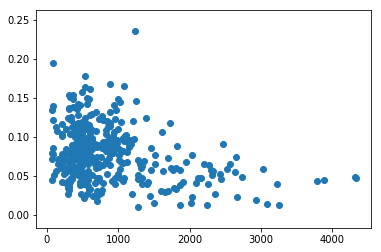

In [168]:
plt.scatter(denver_crime_by_neighborhood['TOTAL'],percentage_column)
plt.show()

In [176]:
denver_crime_by_neighborhood.columns

Index(['aggravated-assault', 'all-other-crimes', 'arson', 'auto-theft',
       'burglary', 'drug-alcohol', 'larceny', 'murder',
       'other-crimes-against-persons', 'public-disorder', 'robbery',
       'sexual-assault', 'theft-from-motor-vehicle', 'white-collar-crime',
       'TOTAL'],
      dtype='object', name='OFFENSE_CATEGORY_ID')

In [207]:
def generate_h_test_results(data):
    total_column=data['TOTAL']
    total_column2=sm.add_constant(total_column)
    data_without_total=data.drop('TOTAL',axis=1)
    results=pd.DataFrame(index=data_without_total.columns,columns=['slope','intercept','r_squared','slope_005','slope_995'])
    for column in data_without_total.columns:
        percentage_column=data[column].div(total_column)
        res=sm.OLS(percentage_column,total_column2,hasConst=True).fit()
        results.at[column,'slope']=res.params[1]
        results.at[column,'intercept']=res.params[0]
        results.at[column,'r_squared']=res.rsquared
        x=res.conf_int(.01)
        results.at[column,'slope_005']=x.iloc[1][0]
        results.at[column,'slope_995']=x.iloc[1][1]
    return results


        


In [208]:
h=generate_h_test_results(denver_crime_by_neighborhood)
h

,slope,intercept,r_squared,slope_005,slope_995
OFFENSE_CATEGORY_ID,,,,,
aggravated-assault,5.11922e-06,0.0241098,0.0650474,2.56872e-06,7.66973e-06
all-other-crimes,4.91669e-05,0.177668,0.131802,3.25839e-05,6.57499e-05
arson,-3.51842e-07,0.00220844,0.00809686,-8.63603e-07,1.59918e-07
auto-theft,-1.54894e-05,0.0927424,0.0981791,-2.16586e-05,-9.32022e-06
burglary,-3.51484e-05,0.11728,0.279939,-4.25564e-05,-2.77404e-05
drug-alcohol,3.56186e-05,0.0399183,0.234826,2.71692e-05,4.4068e-05
larceny,5.11224e-06,0.12857,0.00228964,-8.91176e-06,1.91362e-05
murder,6.13789e-08,0.000687962,0.00104048,-1.88552e-07,3.1131e-07
other-crimes-against-persons,6.78392e-06,0.0562878,0.0473876,2.78679e-06,1.07811e-05


In [129]:
denver_neighborhood_percents=denver_crime_by_neighborhood.div(denver_crime_by_neighborhood['TOTAL'],axis=0)
denver_neighborhood_percents

OFFENSE_CATEGORY_ID            aggravated-assault  all-other-crimes     arson  \
NEIGHBORHOOD_ID REPORTED_DATE                                                   
athmar-park     2014                     0.030115          0.361382  0.001771   
                2015                     0.032229          0.336616  0.002686   
                2016                     0.035013          0.362084  0.000854   
                2017                     0.030075          0.337272  0.004296   
                2018                     0.042530          0.295529  0.000000   
auraria         2014                     0.006479          0.250540  0.000000   
                2015                     0.005277          0.389182  0.000000   
                2016                     0.016949          0.362096  0.001541   
                2017                     0.008389          0.350671  0.001678   
                2018                     0.012931          0.403736  0.001437   
baker           2014                     0.025482          0.258953  0.002066   
                2015                     0.021944          0.265674  0.000000   
                2016                     0.018369          0.235121  0.000000   
                2017                     0.025057          0.297646  0.003037   
                2018                     0.021944          0.264890  0.003135   
barnum          2014                     0.024081          0.406844  0.000000   
                2015                     0.036117          0.404063  0.004515   
                2016                     0.030928          0.437572  0.004582   
                2017                     0.038915          0.420991  0.001179   
                2018                     0.038462          0.361823  0.005698   
barnum-west     2014                     0.034211          0.231579  0.000000   
                2015                     0.039813          0.243560  0.004684   
                2016                     0.023861          0.262473  0.000000   
                2017                     0.022403          0.309572  0.002037   
                2018                     0.036782          0.282759  0.004598   
bear-valley     2014                     0.029412          0.092760  0.004525   
                2015                     0.024390          0.130081  0.010163   
                2016                     0.026465          0.111531  0.001890   
                2017                     0.021452          0.125413  0.001650   
                2018                     0.052738          0.148073  0.000000   
...                                           ...               ...       ...   
wellshire       2014                     0.000000          0.028986  0.000000   
                2015                     0.000000          0.061224  0.000000   
                2016                     0.029851          0.059701  0.000000   
                2017                     0.011111          0.144444  0.000000   
                2018                     0.037037          0.061728  0.000000   
west-colfax     2014                     0.026355          0.311747  0.003765   
                2015                     0.030921          0.350000  0.004605   
                2016                     0.047020          0.335099  0.000662   
                2017                     0.040749          0.334251  0.004956   
                2018                     0.039171          0.316820  0.001728   
west-highland   2014                     0.018832          0.163842  0.003766   
                2015                     0.012539          0.186520  0.001567   
                2016                     0.019017          0.169572  0.001585   
                2017                     0.018333          0.178333  0.000000   
                2018                     0.017886          0.165854  0.000000   
westwood        2014                     0.038344          0.438139  0.002556   
                2015           

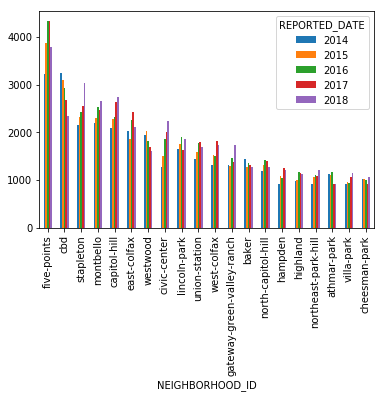

In [110]:
denver_crime_by_year_neighborhood=denver_crime[['REPORTED_DATE','NEIGHBORHOOD_ID']]
denver_crime_by_year_neighborhood=denver_crime_by_year_neighborhood[denver_crime_by_year_neighborhood['REPORTED_DATE']<'2019']
denver_crime_by_year_neighborhood=denver_crime_by_year_neighborhood.groupby([denver_crime_by_year_neighborhood.REPORTED_DATE.dt.year,denver_crime_by_year_neighborhood.NEIGHBORHOOD_ID]).size()
denver_crime_by_year_neighborhood=denver_crime_by_year_neighborhood.unstack(level=0)
denver_crime_by_year_neighborhood['TOTAL']=denver_crime_by_year_neighborhood.sum(axis=1)
denver_crime_by_year_neighborhood=denver_crime_by_year_neighborhood.sort_values('TOTAL',ascending=False)
denver_y_n_top_20=denver_crime_by_year_neighborhood.head(20)
denver_y_n_top_20=denver_y_n_top_20.drop('TOTAL',axis=1)
denver_y_n_top_20.plot.bar()

In [111]:
denver_y_n_top_20

REPORTED_DATE,2014,2015,2016,2017,2018
NEIGHBORHOOD_ID,,,,,
five-points,3230,3878,4323,4333,3783
cbd,3253,3088,2925,2670,2354
stapleton,2164,2328,2437,2560,3032
montbello,2198,2300,2523,2464,2656
capitol-hill,2086,2275,2319,2634,2738
east-colfax,2030,1864,2260,2427,2122
westwood,1956,2037,1821,1700,1617
civic-center,1275,1502,1864,2014,2237
lincoln-park,1654,1765,1912,1624,1868
